In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [2]:

df = pd.read_csv("dataset.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (10000, 17)


,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


In [3]:
selected_columns = [
    'uniq_id',
    'product_name',
    'manufacturer',
    'amazon_category_and_sub_category',
    'description',
    'product_description'
]

df = df[selected_columns]
df.fillna("", inplace=True)

df.head()



,uniq_id,product_name,manufacturer,amazon_category_and_sub_category,description,product_description
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Product Description Hornby 2014 Catalogue Box ...
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Size Name:Large FunkyBuys® Large Christmas Hol...
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Product Description Hornby RailRoad 0-4-0 Gild...


In [4]:
df['combined_text'] = (
    df['product_name'] + " " +
    df['manufacturer'] + " " +
    df['amazon_category_and_sub_category'] + " " +
    df['description'] + " " +
    df['product_description']
)


In [5]:
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
tfidf_matrix = tfidf.fit_transform(df['combined_text'])

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)


TF-IDF Matrix Shape: (10000, 10000)


In [6]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [8]:
indices = pd.Series(df.index, index=df['product_name']).drop_duplicates()

def recommend_products(product_name, top_n=5):
    if product_name not in indices:
        return "Product not found in database."
    
    idx = indices[product_name] 
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    sim_scores = sim_scores[1:top_n+1]
    product_indices = [i[0] for i in sim_scores]
    
    return df[['product_name', 'manufacturer']].iloc[product_indices]

sample_product = df['product_name'].iloc[0]
print("Selected Product:", sample_product)

recommend_products(sample_product, top_n=5)


Selected Product: Hornby 2014 Catalogue


,product_name,manufacturer
5701,Jadlam Racing New HORNBY TRACK R607 8 x DOUBLE...,Hornby
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby
65,Hornby Pennine Express Train Set,Hornby
5772,Hornby RailRoad Wagon BR Horse Box,Hornby
5707,Hornby - Track Rubber,Hornby


In [13]:
def recommend_products_safe(product_name, top_n=5):
    matches = df[df['product_name'].str.contains(product_name, case=False, na=False)]
    
    if len(matches) == 0:
        return "No matching products found. Try a different keyword."
    
    selected_name = matches.iloc[0]['product_name']
    print("Using product:", selected_name)
    
    idx = indices[selected_name]
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    
    product_indices = [i[0] for i in sim_scores]
    
    return df[['product_name', 'manufacturer']].iloc[product_indices]

user_product = input("Enter product")
recommend_products_safe(user_product, top_n=5)



Enter product hornby


Using product: Hornby 2014 Catalogue


,product_name,manufacturer
5701,Jadlam Racing New HORNBY TRACK R607 8 x DOUBLE...,Hornby
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby
65,Hornby Pennine Express Train Set,Hornby
5772,Hornby RailRoad Wagon BR Horse Box,Hornby
5707,Hornby - Track Rubber,Hornby


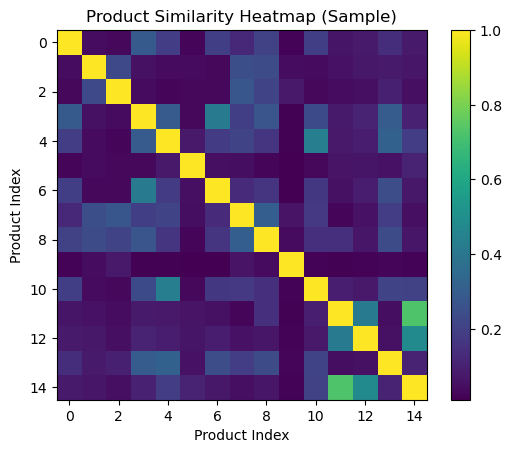

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Select small subset for visualization
sample_size = 15
subset_sim = cosine_sim[:sample_size, :sample_size]

plt.figure()
plt.imshow(subset_sim)
plt.title("Product Similarity Heatmap (Sample)")
plt.xlabel("Product Index")
plt.ylabel("Product Index")
plt.colorbar()
plt.show()


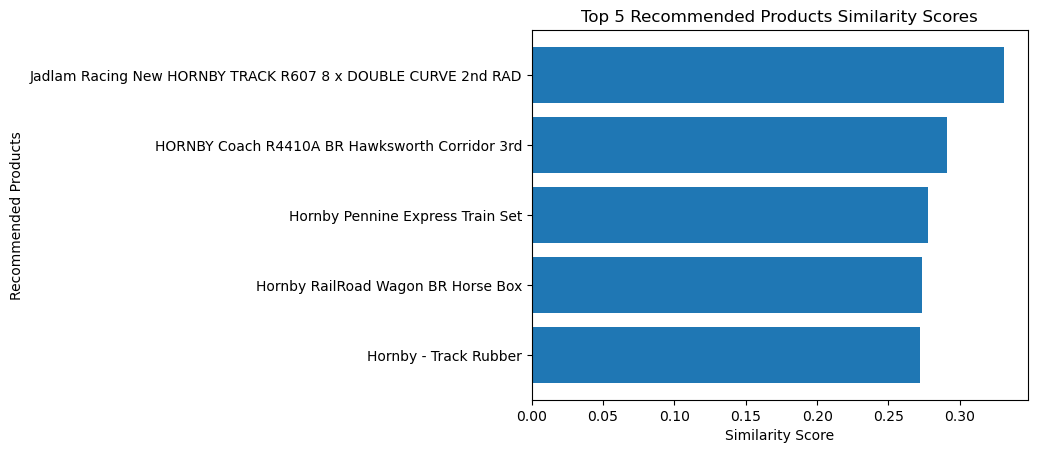

In [15]:
# Select a product index
product_index = 0

# Get similarity scores
sim_scores = list(enumerate(cosine_sim[product_index]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]

product_ids = [i[0] for i in sim_scores]
similarities = [i[1] for i in sim_scores]
product_names = df['product_name'].iloc[product_ids]

# Plot
plt.figure()
plt.barh(product_names, similarities)
plt.xlabel("Similarity Score")
plt.ylabel("Recommended Products")
plt.title("Top 5 Recommended Products Similarity Scores")
plt.gca().invert_yaxis()
plt.show()
